In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
sales = pd.read_csv('data/sales_train_validation.csv')
prices = pd.read_csv('data/sell_prices.csv')
calendar = pd.read_csv('data/calendar.csv')

# Mô tả dữ liệu Sales
M5 là bộ dữ liệu với mục đích dự đoán số lượng sản phẩm bán ra của một tập đoàn bán lẻ lớn tại Hoa Kỳ
Sales Data: Dữ liệu lịch sử về số lượng bán hàng hàng ngày cho từng sản phẩm tại từng của hàng trong giai đoạn từ ngày bắt đầu đến trước ngày bắt đầu giai đoạn dự báo  
Chi tiết về các cột:  
    - id: sự kết hợp của mã sản phẩm và mã cửa hàng(ko cần thiết)  
    - item_id: Mã sản phẩm duy nhấ(ko cần thiết)  
    - dept_id: Mã phòng ban(ko cần thiết)  
    - store_id: mã cửa hàng  
    - state_id: mã tiểu bang  
    - d_1,d_2,...,d_1941: số lượng sản phẩm bán được trong ngày từ 1->1941  

In [97]:
sales.tail()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3
30489,FOODS_3_827_WI_3_validation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
sales.head(10)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
5,HOBBIES_1_006_CA_1_validation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,0,1,0,0,0,2,0,0
6,HOBBIES_1_007_CA_1_validation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,1,0,1,0,0,1,1
7,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,15,0,0,...,0,0,1,37,3,4,6,3,2,1
8,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,2,0,7,3,...,0,0,1,1,6,0,0,0,0,0
9,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,0,0,1,0,...,1,0,0,0,0,0,0,2,0,2


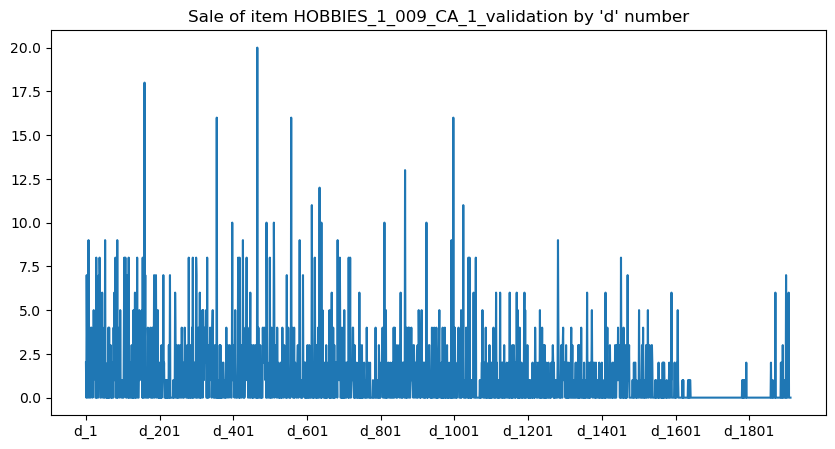

In [122]:
x_labels = [d for d in sales.columns if 'd_' in d]
plt.figure(figsize=(10, 5))
plt.plot(sales.iloc[8, 6:].values, label='sales')
plt.title(f"Sale of item {sales.iloc[8, 0]} by 'd' number")
plt.xticks(ticks=range(0,len(x_labels),200),labels = x_labels[::200])
plt.show()

In [62]:
len(sales['store_id'].unique())

10

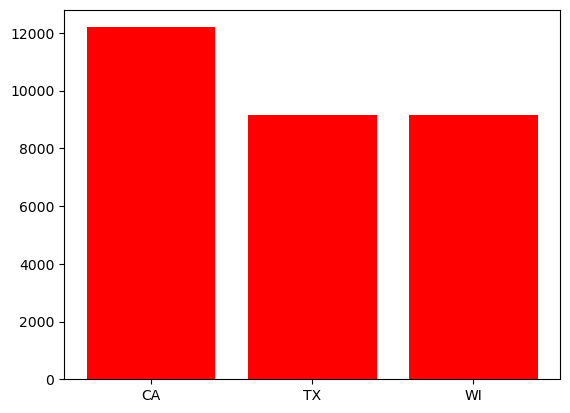

<Figure size 640x480 with 0 Axes>

In [60]:
sales['state_id'].value_counts()
plt.bar(sales['state_id'].value_counts().index, sales['state_id'].value_counts().values, color = 'r')
plt.show()
plt.savefig('saved/images/state_id.png')

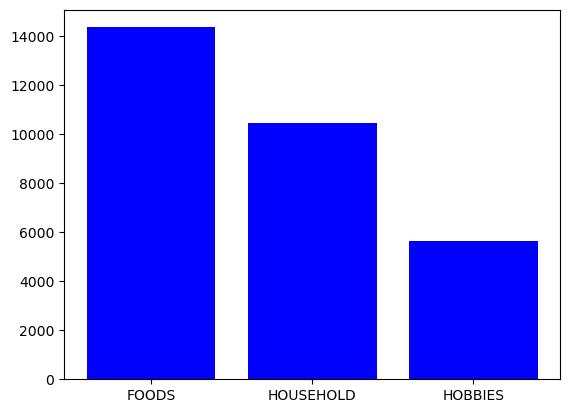

In [53]:
sales['cat_id'].value_counts()
plt.bar(sales['cat_id'].value_counts().index, sales['cat_id'].value_counts().values, color='blue')
plt.savefig('saved/images/category_distribution.png')
plt.show()

# **Mô tả dữ liệu prices**
sell_prices.csv chứa thông tin về giá thành sản phẩm bán được trên mỗi cửa hàng và ngày 
- store_id: mã cửa hàng
- item_id: mã đơn hàng
- wm_yr_wk: tuần trong năm
- sell_price: giá sản phẩm được bán trong tuần

In [101]:
prices

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


In [102]:
prices['wm_yr_wk'].value_counts()

wm_yr_wk
11609    30490
11621    30490
11604    30490
11605    30490
11606    30490
         ...  
11105    13033
11104    12799
11103    12519
11102    11975
11101    10932
Name: count, Length: 282, dtype: int64

In [96]:
prices.tail()

,store_id,item_id,wm_yr_wk,sell_price
6841116,WI_3,FOODS_3_827,11617,1.0
6841117,WI_3,FOODS_3_827,11618,1.0
6841118,WI_3,FOODS_3_827,11619,1.0
6841119,WI_3,FOODS_3_827,11620,1.0
6841120,WI_3,FOODS_3_827,11621,1.0


In [44]:
prices.head(10)

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
5,CA_1,HOBBIES_1_001,11330,8.26
6,CA_1,HOBBIES_1_001,11331,8.26
7,CA_1,HOBBIES_1_001,11332,8.26
8,CA_1,HOBBIES_1_001,11333,8.26
9,CA_1,HOBBIES_1_001,11334,8.26


In [84]:
prices['store_id'].value_counts()

store_id
TX_2    701214
TX_1    699796
CA_1    698412
WI_3    696094
CA_3    693990
TX_3    691112
CA_4    679025
WI_2    678171
WI_1    665912
CA_2    637395
Name: count, dtype: int64

# **Mô tả dữ liệu calendar**
calendar.csv chưa đựng thông tin về ngày mà sản phẩm được bán
- date: ngày
- wm_yr_wk: tuần của năm
- weekday: ngày trong tuần
- month: tháng
- year: năm
- d: tính từ ngày đầu tiên là d1
- event_name: sự kiện 
- even_type: loại sự kiện
- snap_CA: khuyến mại

In [95]:
calendar

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,nan,nan,nan,nan,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,nan,nan,nan,nan,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,nan,nan,nan,nan,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,nan,nan,nan,nan,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,nan,nan,nan,nan,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,nan,nan,nan,nan,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,nan,nan,nan,nan,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,nan,nan,nan,nan,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,nan,nan,nan,nan,0,0,0


In [76]:
numNan1 = calendar['event_name_1'].isna().sum()
numNan2 = calendar['event_name_2'].isna().sum()

In [77]:
event_cols = [col for col in calendar.columns if 'event' in col]
for col in event_cols:
    calendar[col] = calendar[col].fillna('nan')
event_cols
calendar['event_name_1'].isna().sum()
print("NaN before fill: ", numNan1, numNan2)
print("NaN after fill:", calendar['event_name_1'].isna().sum(), calendar['event_name_2'].isna().sum())

NaN before fill:  1807 1964
NaN after fill: 0 0


In [85]:
sample_output = pd.read_csv('data/sample_submission.csv')

In [100]:
calendar.groupby('wm_yr_wk')
calendar

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,nan,nan,nan,nan,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,nan,nan,nan,nan,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,nan,nan,nan,nan,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,nan,nan,nan,nan,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,nan,nan,nan,nan,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,nan,nan,nan,nan,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,nan,nan,nan,nan,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,nan,nan,nan,nan,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,nan,nan,nan,nan,0,0,0


In [113]:
sales

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [114]:
prices

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


In [115]:
calendar

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,nan,nan,nan,nan,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,nan,nan,nan,nan,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,nan,nan,nan,nan,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,nan,nan,nan,nan,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,nan,nan,nan,nan,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,nan,nan,nan,nan,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,nan,nan,nan,nan,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,nan,nan,nan,nan,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,nan,nan,nan,nan,0,0,0


In [119]:
def downtype(df):
    cols = df.dtypes.index.tolist()
    types = df.dtypes.values.tolist()
    for i,j in enumerate(types):
        if pd.api.types.is_integer_dtype(j):
            if(df[cols[i]].min() >= np.iinfo(np.int8).min and df[cols[i]].max() <= np.iinfo(np.int8).max):
                df[cols[i]] = df[cols[i]].astype(np.int8)
            elif(df[cols[i]].min() >= np.iinfo(np.int16).min and df[cols[i]].max() <= np.iinfo(np.int16).max):
                df[cols[i]] = df[cols[i]].astype(np.int16)
            elif(df[cols[i]].min() >= np.iinfo(np.int32).min and df[cols[i]].max() <= np.iinfo(np.int32).max):
                df[cols[i]] = df[cols[i]].astype(np.int32)
            elif(df[cols[i]].min() >= np.iinfo(np.int64).min and df[cols[i]].max() <= np.iinfo(np.int64).max):
                df[cols[i]] = df[cols[i]].astype(np.int64)
        elif pd.api.types.is_float_dtype(j):
            if(df[cols[i]].min() >= np.finfo(np.float16).min and df[cols[i]].max() <= np.finfo(np.float16).max):
                df[cols[i]] = df[cols[i]].astype(np.float16)
            elif(df[cols[i]].min() >= np.finfo(np.float32).min and df[cols[i]].max() <= np.finfo(np.float32).max):
                df[cols[i]] = df[cols[i]].astype(np.float32)
            elif(df[cols[i]].min() >= np.finfo(np.float64).min and df[cols[i]].max() <= np.finfo(np.float64).max):
                df[cols[i]] = df[cols[i]].astype(np.float64)
        elif pd.api.types.is_object_dtype(j):
            if cols[i] == 'date':
                df[cols[i]] = pd.to_datetime(df[cols[i]], format='%Y-%m-%d')
            else:
                df[cols[i]] = df[cols[i]].astype('category')
    return df

In [121]:
import pandas as pd

# Đọc các file CSV
sales_df = pd.read_csv("data/sales_train_validation.csv")
calendar_df = pd.read_csv("data/calendar.csv")
prices_df = pd.read_csv("data/sell_prices.csv")

sales_df = downtype(sales_df)
prices_df = downtype(prices_df)
calendar_df = downtype(calendar_df)
# Reshape sales_df to have a 'd' column
sales_melted = sales_df.melt(id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], 
                             var_name='d', 
                             value_name='sales')

# Merge sales_melted với calendar dựa trên cột 'd'
merged_df_1 = pd.merge(sales_melted, calendar_df, on="d", how="left")

# Merge kết quả trên với prices dựa trên 'store_id' và 'item_id'
final_df = pd.merge(merged_df_1, prices_df, on=["store_id", "item_id", "wm_yr_wk"], how="left")

print(final_df.head())

MemoryError: Unable to allocate 445. MiB for an array with shape (58357860,) and data type object